<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
# Display column names
print("Column Names:")
print(df.columns)

# Display data types for each column
print("\nData Types:")
print(df.dtypes)

# Display summary information about the DataFrame
print("\nSummary Information:")
df.info()

# Display basic statistics for numerical columns
print("\nBasic Statistics for Numerical Columns:")
print(df.describe())

# Optionally, display basic statistics for categorical columns
print("\nBasic Statistics for Categorical Columns:")
print(df.describe(include=['object']))


Column Names:
Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

Data Types:
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

Summary Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB

Basic St

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



Missing values per column:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


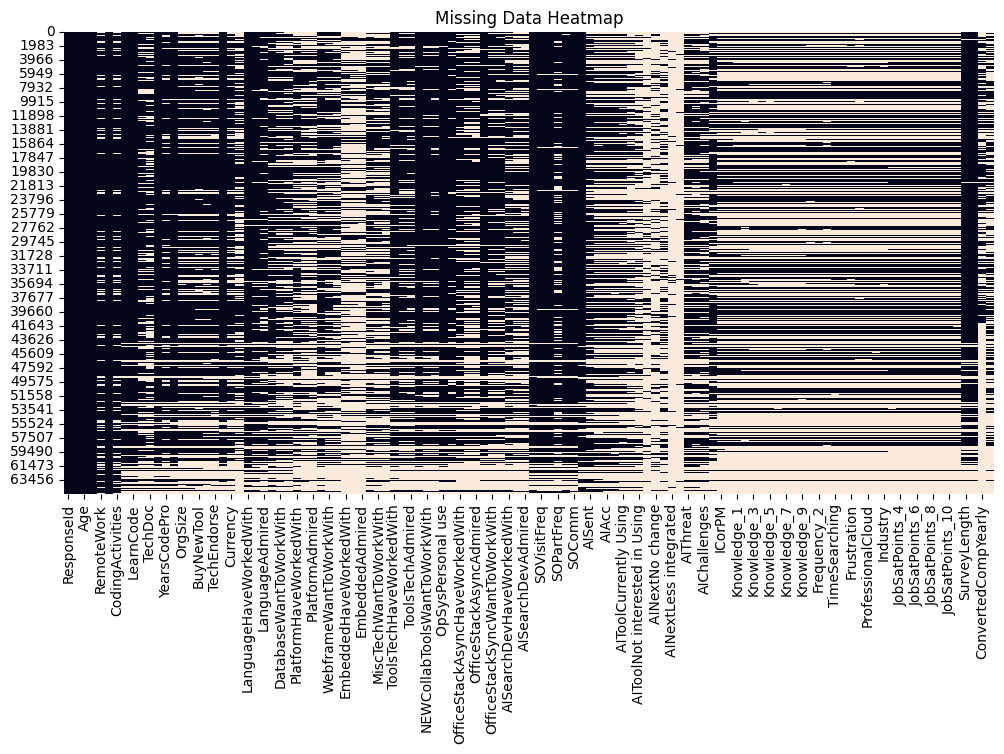


Missing values after imputation:
Employment    0
RemoteWork    0
dtype: int64


In [4]:
# 1. Identify missing values for all columns
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# 2. Optionally, visualize missing data using a heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

# 3. Impute missing values for critical columns

# Example: Impute 'Employment' column with the most frequent value
most_frequent_employment = df['Employment'].mode()[0]
df['Employment'] = df['Employment'].fillna(most_frequent_employment)

# Example: Impute 'RemoteWork' column with the most frequent value
most_frequent_remote = df['RemoteWork'].mode()[0]
df['RemoteWork'] = df['RemoteWork'].fillna(most_frequent_remote)

# Verify that missing values are handled
print("\nMissing values after imputation:")
print(df[['Employment','RemoteWork']].isnull().sum())


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [5]:
# 1. Analyze Employment column
print("Employment distribution:")
print(df['Employment'].value_counts())

# 2. Analyze Job Satisfaction (JobSat) column
print("\nJob Satisfaction distribution:")
print(df['JobSat'].value_counts())

# 3. Analyze Years of Professional Coding Experience (YearsCodePro)
print("\nYears of Professional Coding Experience distribution:")
print(df['YearsCodePro'].value_counts())


Employment distribution:
Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking fo

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


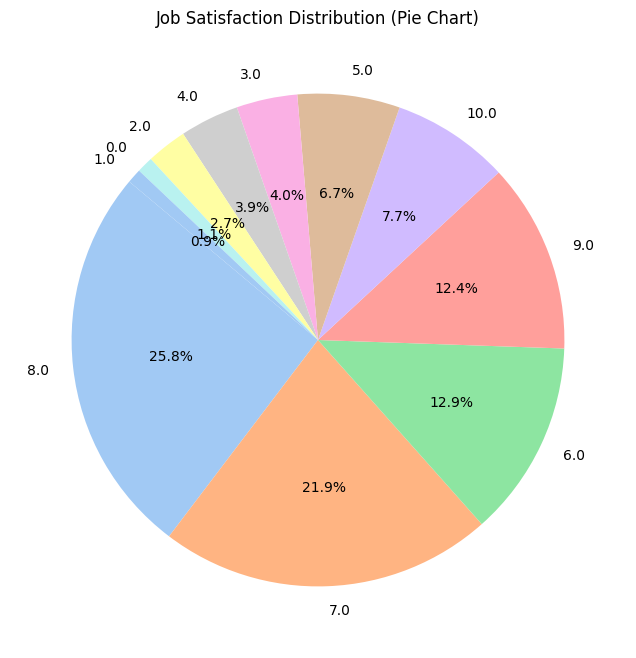

/tmp/ipykernel_635/1018352886.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['JobSatPoints_1'].dropna(), shade=True, color="skyblue")


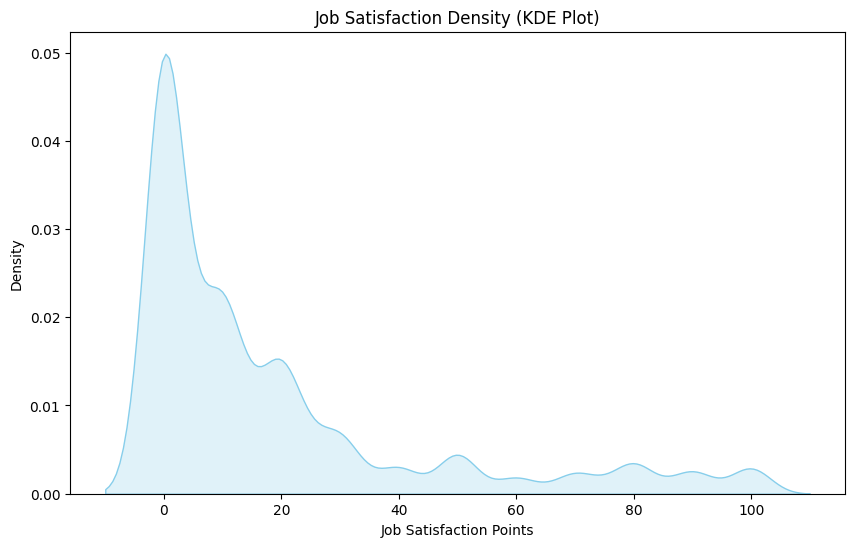

In [6]:
# Pie Chart for Job Satisfaction
job_counts = df['JobSat'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Job Satisfaction Distribution (Pie Chart)")
plt.show()

# KDE Plot (if JobSatPoints_1 is numerical)
if 'JobSatPoints_1' in df.columns:
    plt.figure(figsize=(10,6))
    sns.kdeplot(df['JobSatPoints_1'].dropna(), shade=True, color="skyblue")
    plt.title("Job Satisfaction Density (KDE Plot)")
    plt.xlabel("Job Satisfaction Points")
    plt.show()


### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


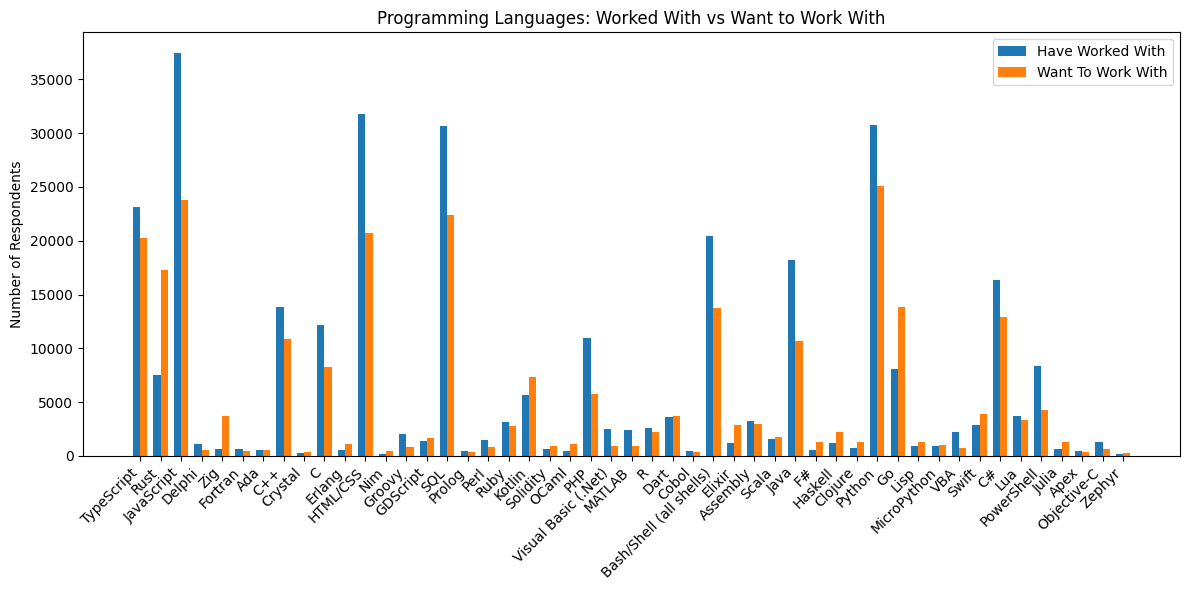

In [8]:
# Split the semicolon-separated strings into lists
have_lang = df['LanguageHaveWorkedWith'].dropna().str.split(';')
want_lang = df['LanguageWantToWorkWith'].dropna().str.split(';')

# Flatten the lists and count frequency
from collections import Counter

have_count = Counter([lang.strip() for sublist in have_lang for lang in sublist])
want_count = Counter([lang.strip() for sublist in want_lang for lang in sublist])

# Convert to DataFrame for plotting
import pandas as pd

lang_df = pd.DataFrame({
    'Language': list(set(list(have_count.keys()) + list(want_count.keys()))),
})
lang_df['WorkedWith'] = lang_df['Language'].map(have_count).fillna(0)
lang_df['WantToWorkWith'] = lang_df['Language'].map(want_count).fillna(0)

# Plot grouped bar chart
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(lang_df['Language']))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, lang_df['WorkedWith'], width, label='Have Worked With')
plt.bar(x + width/2, lang_df['WantToWorkWith'], width, label='Want To Work With')
plt.xticks(x, lang_df['Language'], rotation=45, ha='right')
plt.ylabel('Number of Respondents')
plt.title('Programming Languages: Worked With vs Want to Work With')
plt.legend()
plt.tight_layout()
plt.show()


### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


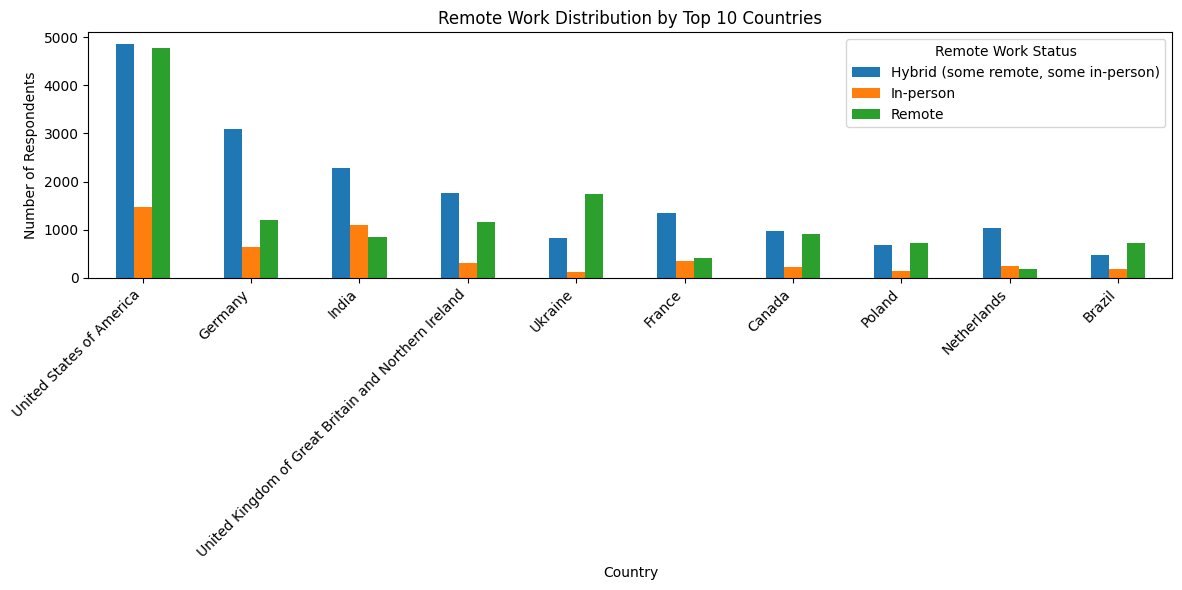

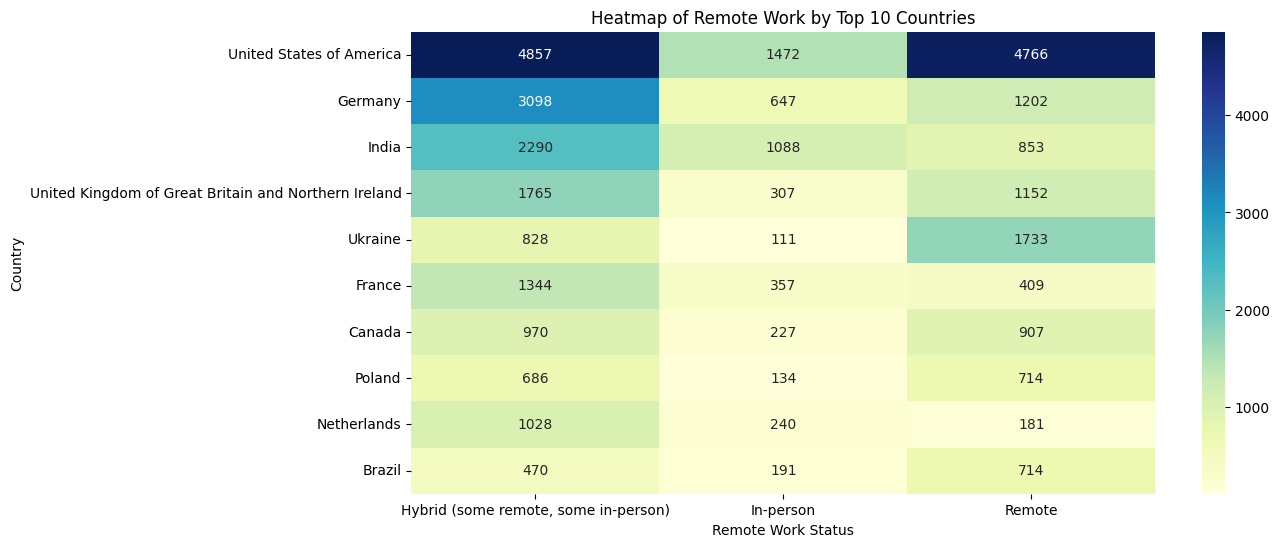

In [9]:
# Count RemoteWork responses by Country
remote_counts = df.groupby(['Country', 'RemoteWork']).size().unstack(fill_value=0)

# Option 1: Grouped bar chart (top 10 countries for readability)
top_countries = remote_counts.sum(axis=1).sort_values(ascending=False).head(10).index
remote_counts_top = remote_counts.loc[top_countries]

remote_counts_top.plot(kind='bar', stacked=False, figsize=(12,6))
plt.title("Remote Work Distribution by Top 10 Countries")
plt.ylabel("Number of Respondents")
plt.xlabel("Country")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Remote Work Status")
plt.tight_layout()
plt.show()

# Option 2: Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(remote_counts_top, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap of Remote Work by Top 10 Countries")
plt.ylabel("Country")
plt.xlabel("Remote Work Status")
plt.show()


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


Pearson correlation between YearsCodePro and JobSatPoints_1: -0.03


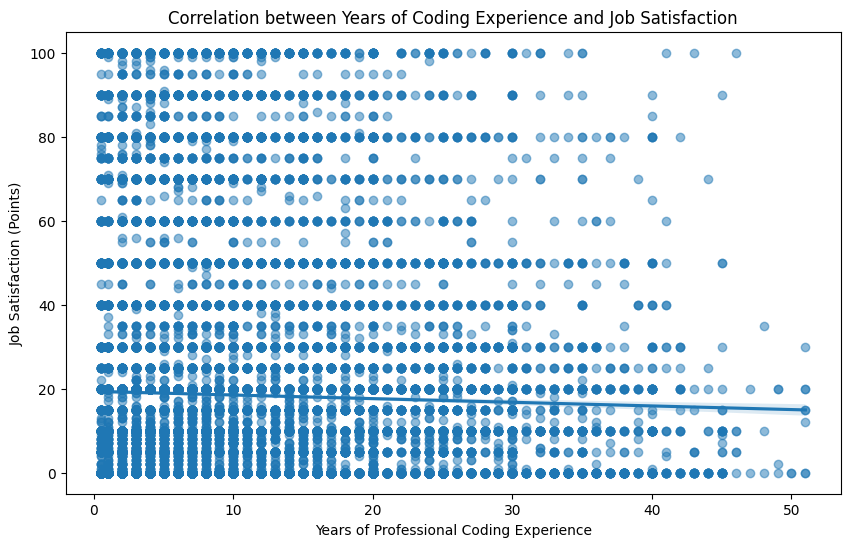

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Convert YearsCodePro to numeric values
def convert_years(x):
    if pd.isnull(x):
        return np.nan
    if x == "Less than 1 year":
        return 0.5
    if x == "More than 50 years":
        return 51
    try:
        return float(x)
    except:
        return np.nan

df['YearsCodePro_numeric'] = df['YearsCodePro'].apply(convert_years)

# Drop rows with missing values in these columns
df_corr = df.dropna(subset=['YearsCodePro_numeric', 'JobSatPoints_1'])

# Calculate Pearson correlation only (works without scipy)
pearson_corr = df_corr['YearsCodePro_numeric'].corr(df_corr['JobSatPoints_1'], method='pearson')
print(f"Pearson correlation between YearsCodePro and JobSatPoints_1: {pearson_corr:.2f}")

# Scatter plot with regression line
plt.figure(figsize=(10,6))
sns.regplot(x='YearsCodePro_numeric', y='JobSatPoints_1', data=df_corr, scatter_kws={'alpha':0.5})
plt.title("Correlation between Years of Coding Experience and Job Satisfaction")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Job Satisfaction (Points)")
plt.show()


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                1059   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      16806   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   11011   
Primary/elementary school                                           160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     2073   
Secondary school (e.g. American high school, Ge...                 1460   
Some college/university study without earning a...                 3579   
Something else                                                      377   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree (A.A., A.S., etc.)                        

/tmp/ipykernel_635/1649658828.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


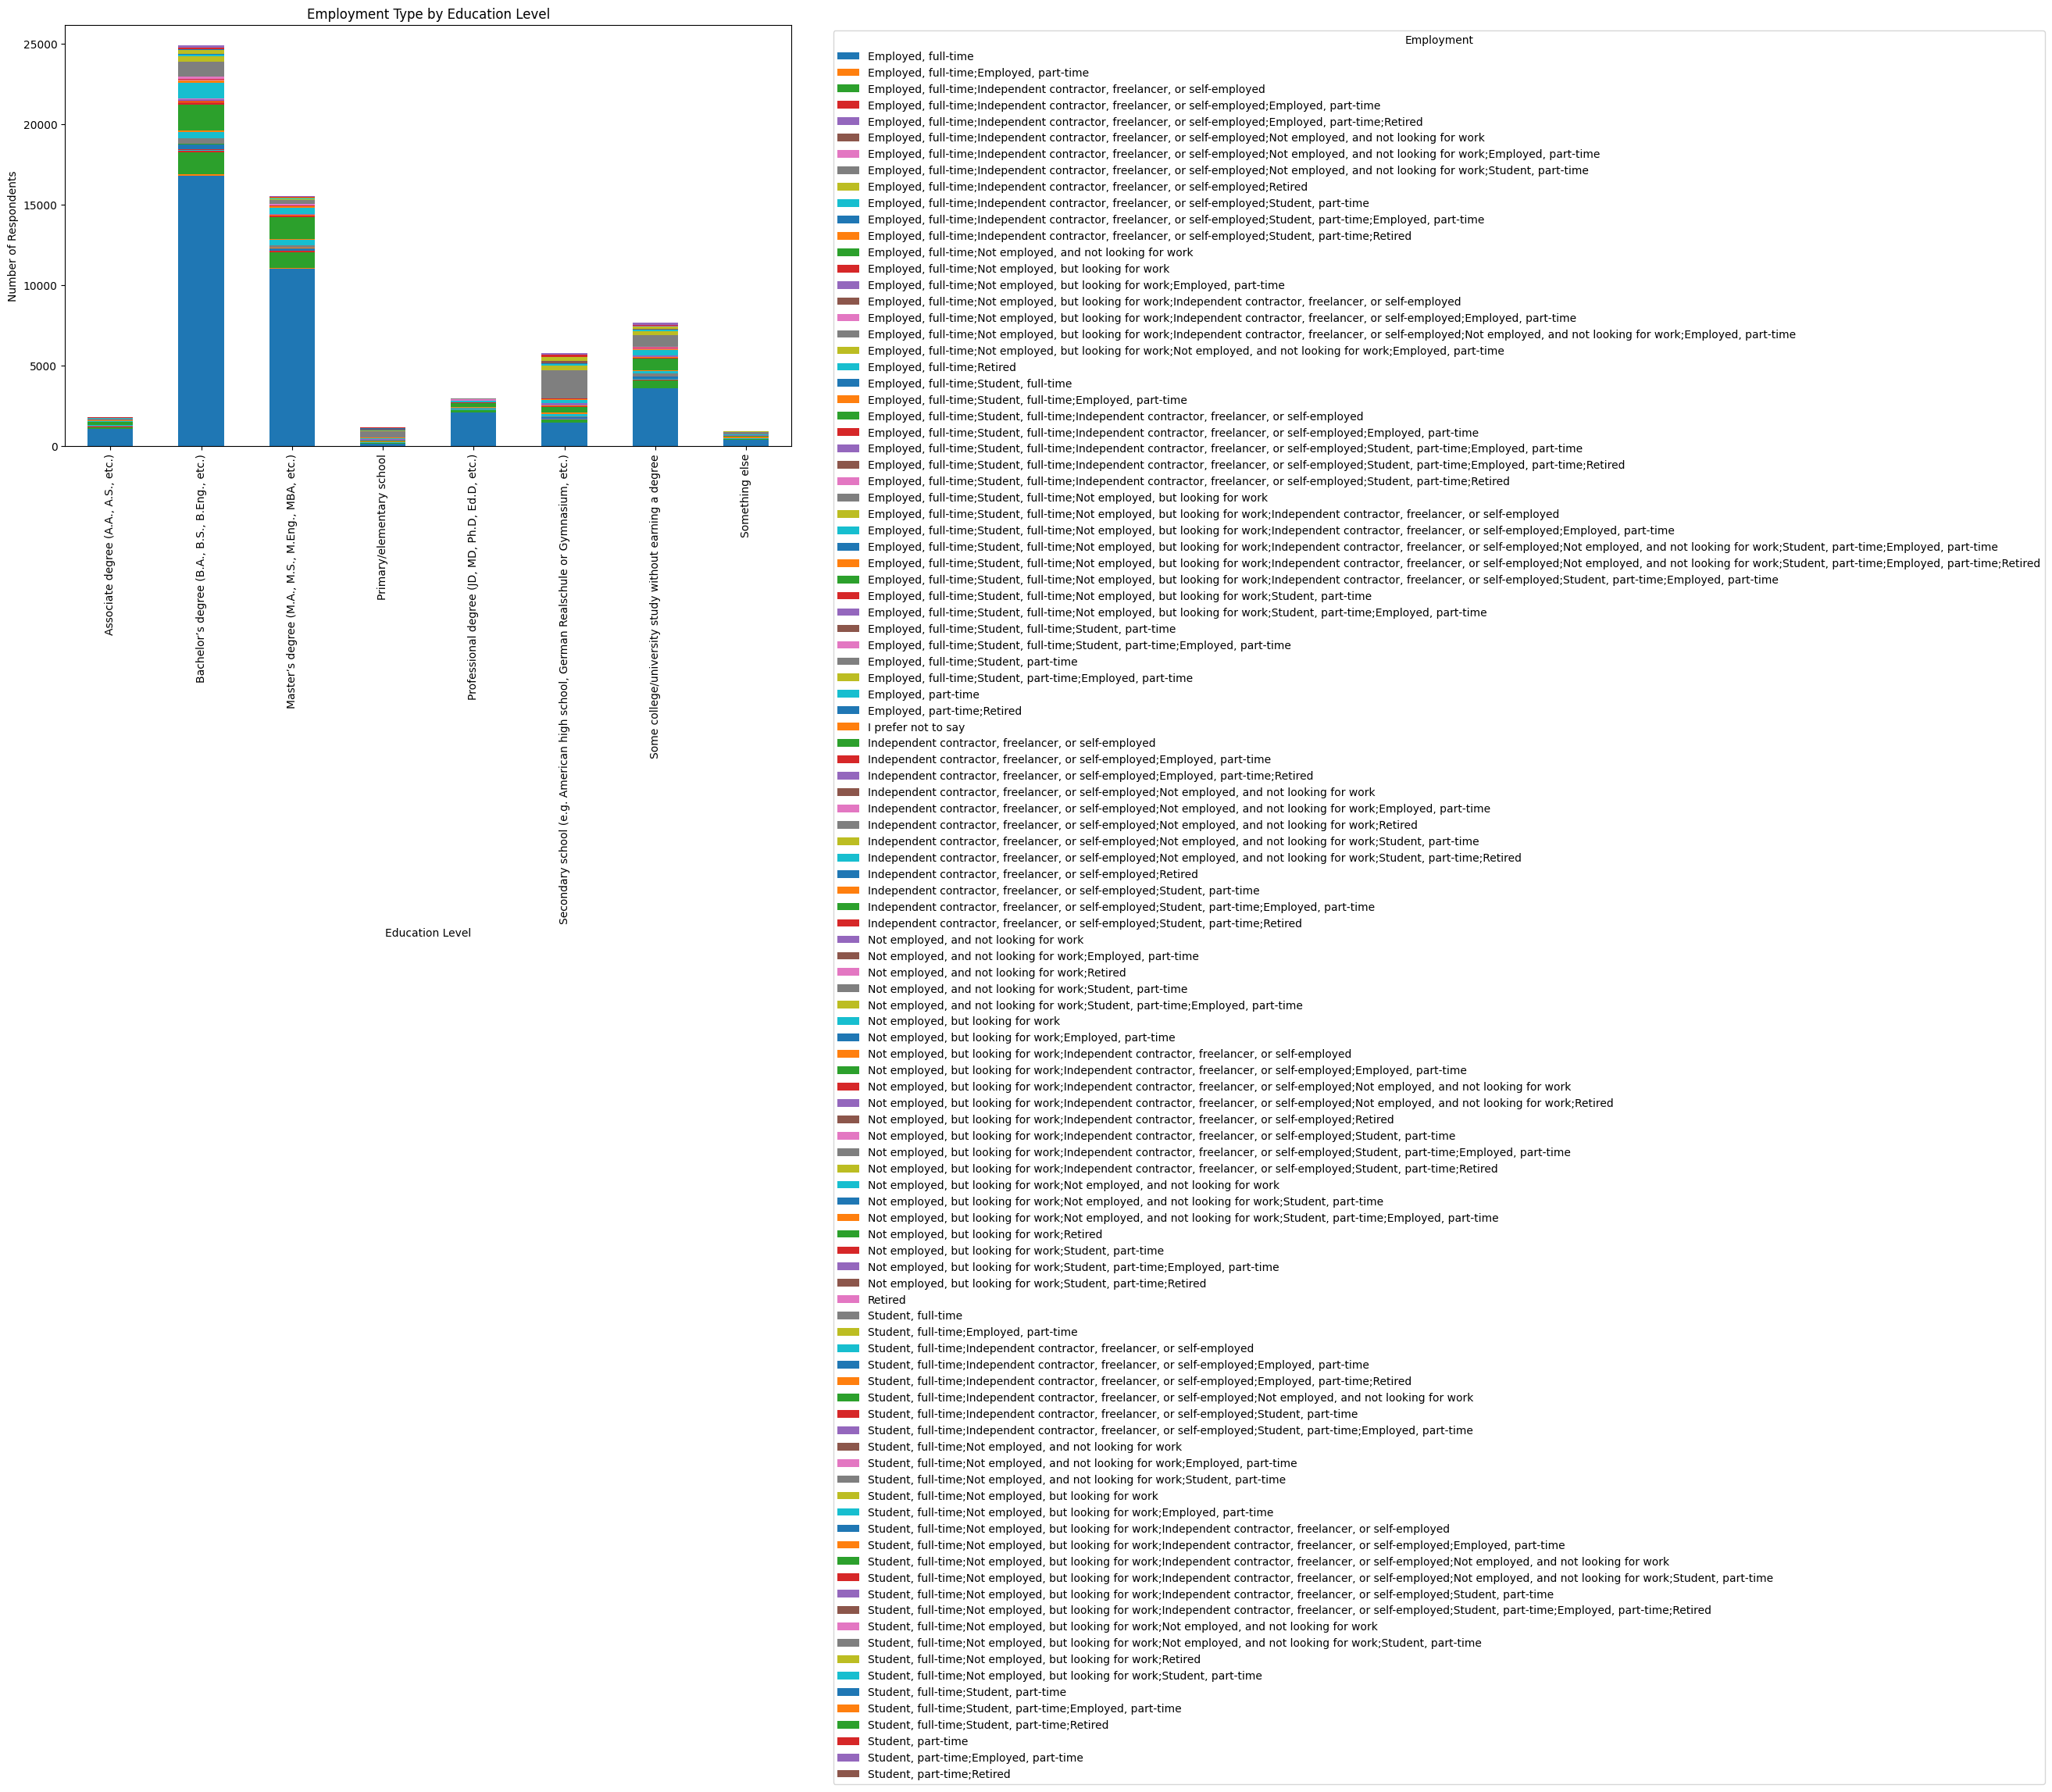

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (if not already loaded)
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Optional: Drop rows with missing values in Employment or EdLevel
df_clean = df.dropna(subset=['Employment', 'EdLevel'])

# Create a cross-tabulation
employment_edu_ct = pd.crosstab(df_clean['EdLevel'], df_clean['Employment'])

# Display the cross-tabulation
print(employment_edu_ct)

# Plot as a stacked bar chart
employment_edu_ct.plot(kind='bar', stacked=True, figsize=(12,7))
plt.title("Employment Type by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Number of Respondents")
plt.legend(title='Employment', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [19]:
# Save the cleaned dataset
df.to_csv("stack_overflow_cleaned.csv", index=False)

# Optional: Excel version (requires openpyxl installed)
# df.to_excel("stack_overflow_cleaned.xlsx", index=False)

# Print confirmation
print("Cleaned dataset has been saved successfully!")


Cleaned dataset has been saved successfully!


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
